<a href="https://colab.research.google.com/github/GeorgeNance/ml-research/blob/master/Pizza_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 17.6 MB/s eta 0:00:00


In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.widgets import *

def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

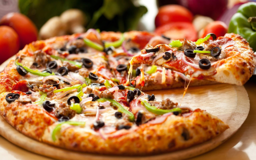

In [4]:
from fastdownload import download_url
dest = 'pizza.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'jelly doughnut photos'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


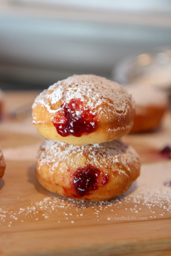

In [5]:
download_url(search_images('jelly doughnut photos', max_images=1)[0], 'doughnut.jpg', show_progress=False)
Image.open('doughnut.jpg').to_thumb(256,256)

In [59]:
searches = 'doughnut','pizza','salad'
path = Path('pizza_or_not_2')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'doughnut photo'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Searching for 'doughnut sun photo'
Searching for 'doughnut shade photo'
Searching for 'pizza photo'
Searching for 'pizza sun photo'
Searching for 'pizza shade photo'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for 'salad photo'
Searching for 'salad sun photo'
Searching for 'salad shade photo'


In [60]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

10

# Build the Model

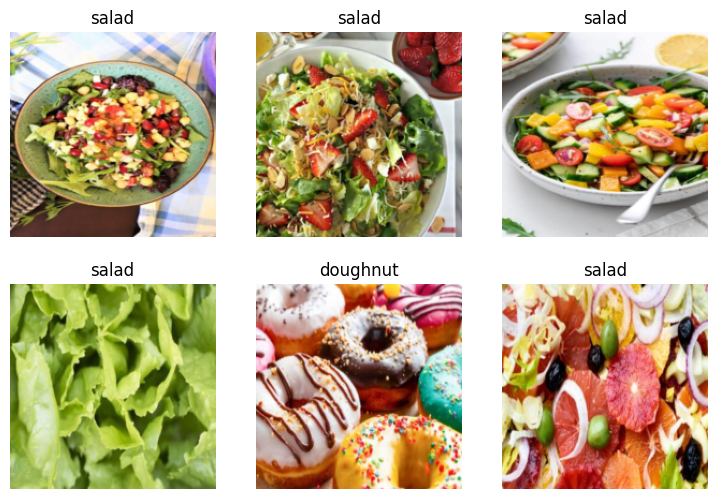

In [72]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [73]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

# Cleanup

In [69]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [70]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Run it

Searching for 'ice cream pizza'


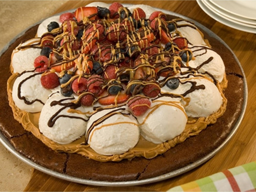

In [87]:

download_url(search_images('ice cream pizza', max_images=1)[0], 'test.jpg', show_progress=False)
Image.open('test.jpg').to_thumb(256,256)

In [95]:
is_pizza,_,probs = learn.predict(PILImage.create('test.jpg'))
print(f"This is a: {is_pizza}.")
print(f"Probability it's pizza: {probs[1]:.4f}")


This is a: pizza.
Probability it's pizza: 0.9876
